# Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn

## 4. Обучение без учителя в Scikit-learn

#### Задание 1

Импортируйте библиотеки `pandas` и `numpy`.

Загрузите "`Boston House Prices dataset`" из встроенных наборов данных библиотеки `sklearn`. 

Создайте датафреймы `X` и `y` из этих данных.

Разбейте эти датафреймы на тренировочные (`X_train`, `y_train`) и тестовые (`X_test`, `y_test`) с помощью функции `train_test_split` так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент `random_state` должен быть равен 42.

Масштабируйте данные с помощью `StandardScaler`.

Постройте модель `TSNE` на тренировочных данных с параметрами:
```
n_components=2, learning_rate=250, random_state=42.
```
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston['data']

In [6]:
data.shape

(506, 13)

In [7]:
feature_names = boston['feature_names']

In [8]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
target = boston['target']

In [10]:
X = pd.DataFrame(data, columns=feature_names)

In [11]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
y = pd.DataFrame(target, columns=['price'])

In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [19]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

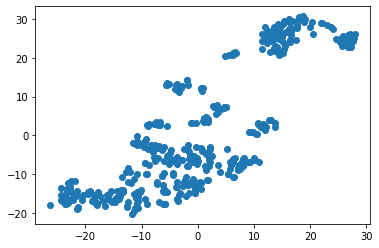

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

#### Задание 2

С помощью `KMeans` разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма `X_train`.

Параметр `max_iter` должен быть равен 100, `random_state` сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения `price` и `CRIM` в разных кластерах.


In [22]:
from sklearn.cluster import KMeans

In [23]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
model.fit_predict(X_train_scaled)

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2,
       0, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,

In [25]:
kmeans = KMeans(n_clusters=3)

In [26]:
c_train_scaled = kmeans.fit_predict(X_train_scaled)

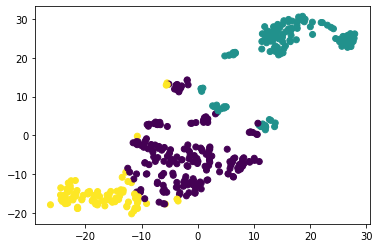

In [27]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=c_train_scaled)
plt.show()

In [28]:
y_train['price'].mean()

22.79653465346535

In [29]:
X_train_scaled['CRIM'].mean()

-1.8425854901266522e-16

In [30]:
y_train[c_train_scaled == 0]['price'].mean()

24.971204188481675

In [31]:
X_train_scaled['CRIM'][c_train_scaled == 0].mean()

-0.3596699936916687

In [32]:
y_train[c_train_scaled == 1]['price'].mean()

16.179687500000004

In [33]:
X_train_scaled['CRIM'][c_train_scaled == 1].mean()

0.8016742296558192

In [34]:
y_train[c_train_scaled == 2]['price'].mean()

27.87411764705882

In [35]:
X_train_scaled['CRIM'][c_train_scaled == 2].mean()

-0.39902744236277904